In [1]:
import sys
from pyrosm import OSM
import osmnx as ox
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
osm=OSM("base_map/map.pbf")

In [17]:
def node_dict_generator(nodes):

    dict_node={}
    for index, row in nodes.iterrows():
        dict_node[row["id"]]=(row["lon"],row["lat"])

    return dict_node

In [18]:
nodes, edges = osm.get_network(nodes=True, network_type="driving")
node_dict=node_dict_generator(nodes)
G = osm.to_graph(nodes, edges, graph_type="networkx")

In [19]:
def get_traffic_weights(num_edges):
    return [1] * num_edges
    #TODO : Change to MQTT thing or something

In [5]:
def get_optimal_route(graph, start_coords, end_coords):
    nx.set_edge_attributes(graph, "traffic", get_traffic_weights)

    source_node=ox.distance.nearest_nodes(G, start_coords[0], start_coords[1])
    end_node=ox.distance.nearest_nodes(G, end_coords[0], end_coords[1])

    optimal_path_nodes = nx.shortest_path(graph, source_node, end_node, weight="traffic")
    optimal_path_nodes_coords = list(nodes[nodes["id"].isin(optimal_path_nodes)][["lon", "lat"]].itertuples(index=False, name=None))

    return optimal_path_nodes, optimal_path_nodes_coords    
    

In [9]:
incident_on = (-8.6553876,  40.6349828)
emergency_car =  (-8.648849, 40.6318261)

In [10]:
opt_nodes, opt_coords = get_optimal_route(G, incident_on, emergency_car)

# opt_nodes : optimal nodes list
# opt_coords : optimal coords list

In [14]:
nodes

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,-8.648098,40.641192,None,1559482970,3,70857202,1485115785,POINT (-8.64810 40.64119)
1,-8.648258,40.641267,None,1559472123,4,70853604,1237293056,POINT (-8.64826 40.64127)
2,-8.648285,40.641353,None,1559472123,3,70853604,1489665024,POINT (-8.64829 40.64135)
3,-8.648264,40.641419,None,1559472123,4,70853604,1237293049,POINT (-8.64826 40.64142)
4,-8.648229,40.641455,None,1559472123,3,70853604,1489665025,POINT (-8.64823 40.64145)
...,...,...,...,...,...,...,...,...
7932,-8.658390,40.641176,None,1664290579,1,126702333,10056366581,POINT (-8.65839 40.64118)
7933,-8.658290,40.641272,None,1664290579,1,126702333,10056366582,POINT (-8.65829 40.64127)
7934,-8.658277,40.641264,{'barrier': 'gate'},1664290579,1,126702333,10056366583,POINT (-8.65828 40.64126)
7935,-8.658260,40.641239,{'barrier': 'gate'},1664290579,1,126702333,10056366584,POINT (-8.65826 40.64124)


In [11]:
opt_coords

[(-8.649396, 40.6315514),
 (-8.6490522, 40.6315688),
 (-8.6539015, 40.6337421),
 (-8.6538181, 40.6336846),
 (-8.6537413, 40.6335905),
 (-8.6535421, 40.6332991),
 (-8.6535029, 40.6332411),
 (-8.6533382, 40.6329977),
 (-8.6530484, 40.6325988),
 (-8.6550259, 40.6345094),
 (-8.6544616, 40.6347788),
 (-8.6542694, 40.6345705),
 (-8.6509797, 40.6325915),
 (-8.6512731, 40.6325964),
 (-8.6513273, 40.6325973),
 (-8.6494636, 40.6320502),
 (-8.6494942, 40.6322899),
 (-8.6552708, 40.6348109),
 (-8.6550816, 40.6345779),
 (-8.6552903, 40.6348773),
 (-8.6553884, 40.6350003),
 (-8.6491217, 40.6315683),
 (-8.649279, 40.6315582),
 (-8.6504611, 40.6319002),
 (-8.650649, 40.6321006),
 (-8.650859, 40.6324123),
 (-8.6497113, 40.6322024),
 (-8.6520488, 40.6326093),
 (-8.6529136, 40.6326236),
 (-8.6530178, 40.6326123),
 (-8.6540202, 40.6342747),
 (-8.6539891, 40.6342335),
 (-8.6541792, 40.6341363),
 (-8.6539891, 40.6339034),
 (-8.6539437, 40.633772),
 (-8.6539776, 40.6338252),
 (-8.6494813, 40.6321813)]

KeyError: (-8.6475947, 40.6272558)

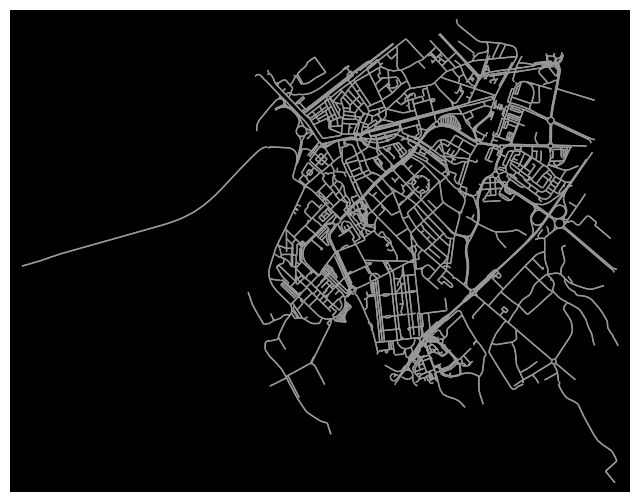

In [13]:
fig, ax = ox.plot_graph_route(G, opt_nodes, route_linewidth=6, node_size=0, bgcolor='k')
plt.show()